# HeartDisease

- __Attribute Information__:

- Only 14 attributes used:
- 1.age
- 2.sex
- 3.cp: chest pain type
      -- Value 1: typical angina
      -- Value 2: atypical angina
      -- Value 3: non-anginal pain
      -- Value 4: asymptomatic
- 4.trestbps=resting blood pressure (in mm Hg on admission to the hospital)
- 5.chol=serum cholestoral in mg/dl
- 6.fbs=fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 7.restecg= resting electrocardiographic results
            -- Value 0: normal
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- 8.thalach=maximum heart rate achieved
- 9.exang= exercise induced angina (1 = yes; 0 = no)
- 10.oldpeak=ST depression induced by exercise relative to rest
- 11.slope= the slope of the peak exercise ST segment
            -- Value 1: upsloping
            -- Value 2: flat
            -- Value 3: downsloping
- 12.ca= number of major vessels (0-3) colored by flourosopy
- 13.thal=3 = normal; 6 = fixed defect; 7 = reversable defect
- 14.num (the predicted attribute)=diagnosis of heart disease (angiographic disease status),presence (values 1,2,3,4) from absence (value 0).
                                    -- Value 0: < 50% diameter narrowing
                                    -- Value 1: > 50% diameter narrowing

In [1]:
#import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file with pandas
df_hd=pd.read_csv("heartdisease.csv")
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
#checking the null value
df_hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
#repalcing '?' to the nan values so we get to know how many values are missing
df_hd.replace('?',np.nan,inplace=True)

In [5]:
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# Now again checking missing values
df_hd.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [7]:
# dropping column 'slope','ca','thal' are the missing data is more than 50% so its better to remove them
df_hd.drop(['slope','ca','thal'],axis=1,inplace=True)

In [8]:
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,0


In [9]:
#replacing nan values with mode just to keep data without float as there might be data in categorical in numeric form
for column in df_hd[['trestbps','thalach','exang','chol','fbs']]:
    df_hd[column].fillna(df_hd[column].mode()[0], inplace=True)

In [10]:
df_hd.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     56
num          0
dtype: int64

In [11]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   144 non-null    object
 10  num       200 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 17.3+ KB


In [12]:
#converting data type of object to int
for col in df_hd[['trestbps','thalach','exang','chol','fbs']]:
    df_hd[col]=df_hd[[col]].astype(str).astype('int64')

In [13]:
#converting data type of object to float for oldpeak column
df_hd['oldpeak']=df_hd[['oldpeak']].astype(str).astype('float64')

In [14]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int64  
 4   chol      200 non-null    int64  
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int64  
 8   exang     200 non-null    int64  
 9   oldpeak   144 non-null    float64
 10  num       200 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 17.3 KB


In [15]:
#replacing nan values with mean
df_hd['oldpeak'].fillna(df_hd['oldpeak'].mean(), inplace=True)

In [16]:
#now there is no data missing
df_hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [17]:
df_hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3.0,2
1,44,1,4,130,209,0,1,127,0,0.0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0


In [45]:
#just convert target with presence of heartdisease(1,2,3,4) to 1 so get good accuracy as data is not big  
df_hd['num'] = df_hd['num'].replace([2,3,4],1)

In [46]:
#now target is presence=1,absence=0 of heartdiseases
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3.000000,1
1,44,1,4,130,209,0,1,127,0,0.000000,0
2,60,1,4,132,218,0,1,140,1,1.500000,1
3,55,1,4,142,228,0,1,149,1,2.500000,1
4,66,1,3,110,213,1,2,99,1,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.000000,1
196,62,1,1,120,139,0,1,120,1,1.320833,0
197,55,1,4,122,223,1,1,100,0,0.000000,1
198,58,1,4,120,385,1,2,120,1,1.320833,0


In [47]:
#statstical data
df_hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,172.490000,0.340000,0.735000,122.055000,0.740000,1.320833,0.745000
std,7.811697,0.171015,0.795701,19.280055,116.752497,0.474898,0.683455,18.876269,0.439735,0.937755,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,120.000000,1.000000,1.320833,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,1.000000


##### for some rows the max value is high there might be outliners which need to be removed

In [48]:
#check the uniqueness of the data
df_hd.nunique()

age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     15
num          2
dtype: int64

In [49]:
#data columns
df_hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

# EDA

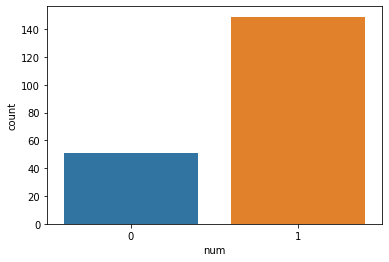

In [50]:
#count plot to kmow the how much have heartdisease and much do not have
sns.countplot(df_hd['num'])

- approx 70% of the people have heartdisease

###### .

#### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak' and 'thal' features

#### Analysing the 'Sex' feature

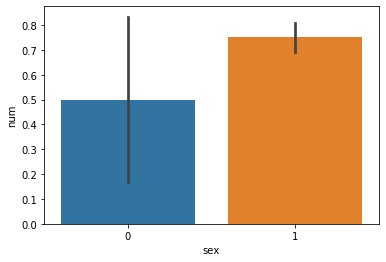

In [51]:
sns.barplot(df_hd["sex"],df_hd["num"])

 - We notice, that males are more likely to have heart problems than females

#### Analysing the 'Chest Pain Type' feature

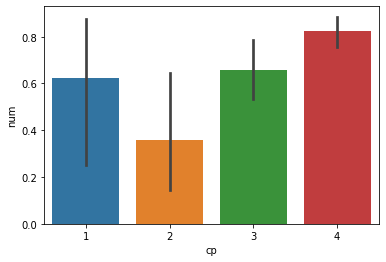

In [52]:
sns.barplot(df_hd["cp"],df_hd['num'])

- Value 2: __atypical angina__ type person  will have less problem of heart

### analysing fasting blood sugar feature

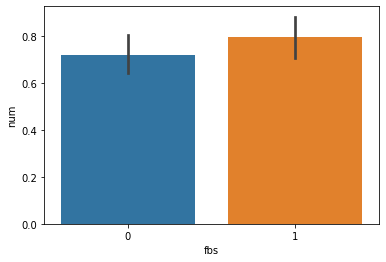

In [53]:
sns.barplot(df_hd["fbs"],df_hd['num'])

- fasting blood sugar feature is true=1,false=0
- we can see that it do not have impact on heart problem if sugar is true/false 

### analysing resting electrocardiographic results feature

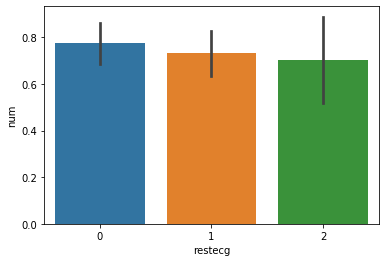

In [54]:
sns.barplot(df_hd["restecg"],df_hd['num'])

### analysing exercise induced angina feature

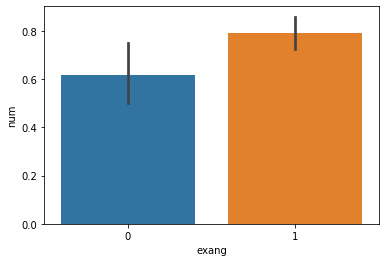

In [55]:
sns.barplot(df_hd["exang"],df_hd['num'])

### analysing maximum heart rate achieved feature

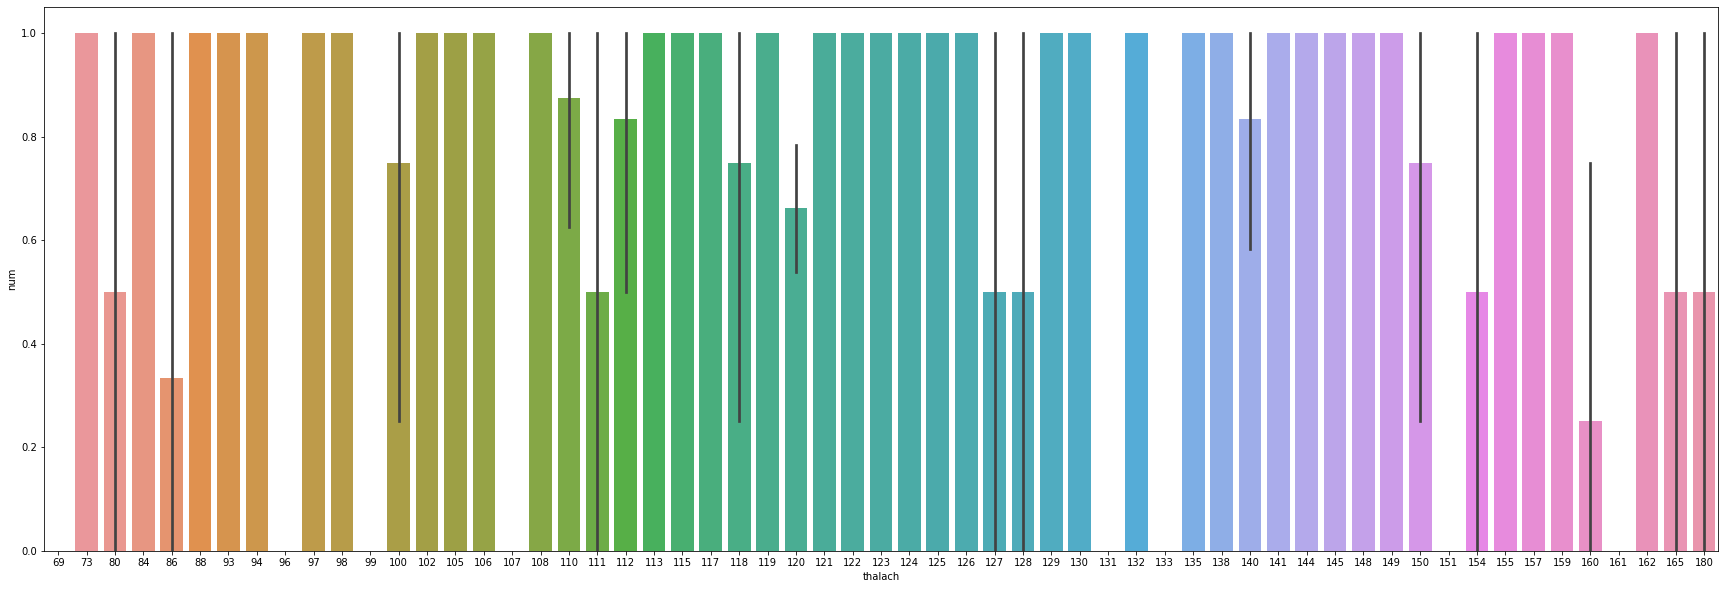

In [56]:
plt.figure(figsize=(30,10))
sns.barplot(df_hd["thalach"],df_hd['num'])

### analysing ST depression induced by exercise relative to rest

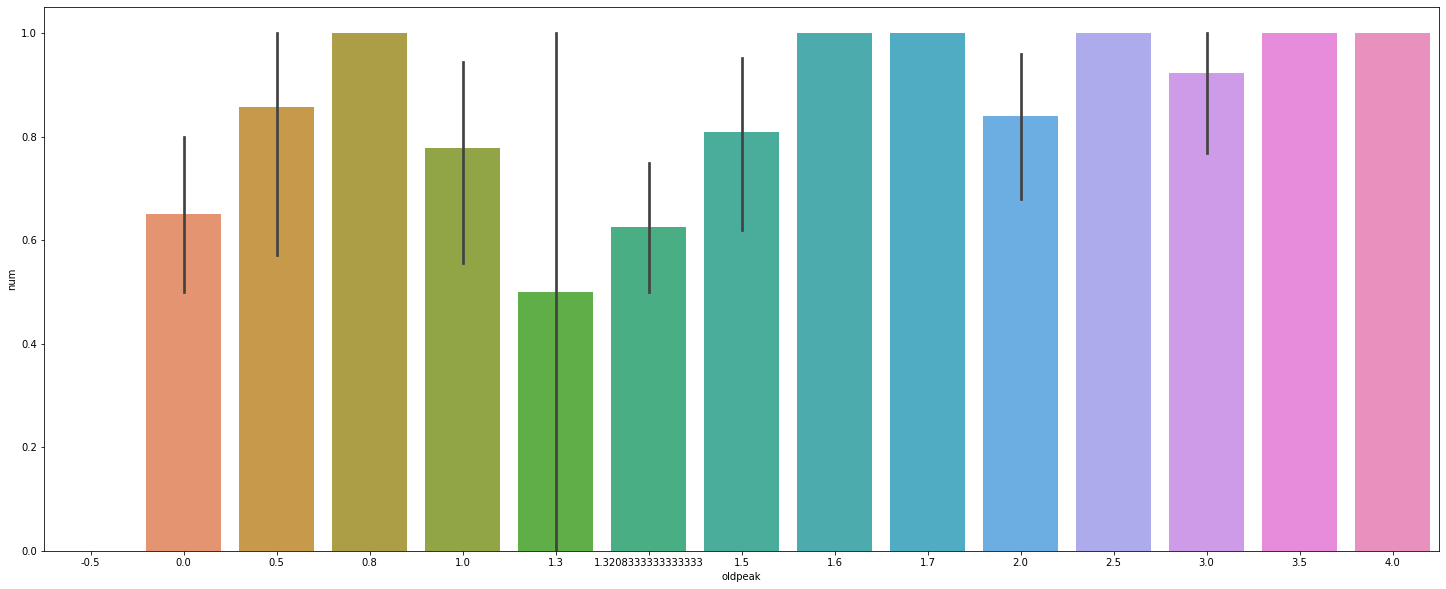

In [57]:
plt.figure(figsize=(25,10))
sns.barplot(df_hd['oldpeak'],df_hd['num'])

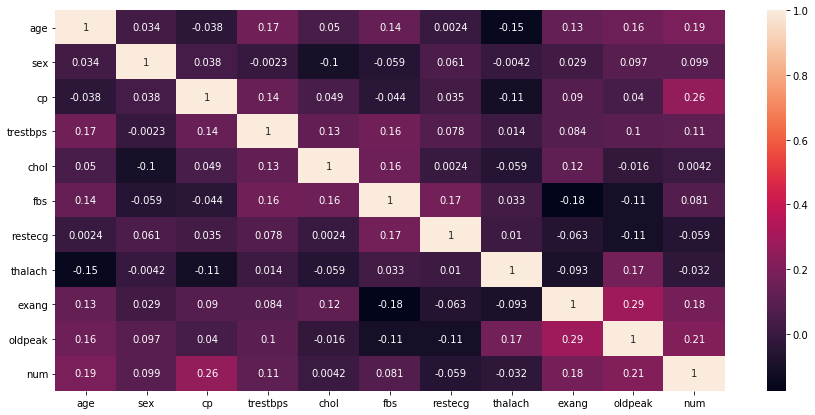

In [58]:
#correlation of data
plt.figure(figsize=(15,7))
sns.heatmap(df_hd.corr(),annot=True)

- All of the columns have good correlation and chest pain is most correlated to target so its imp. feature to know about the heartdisease

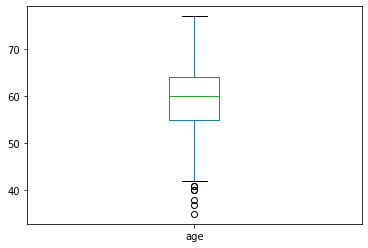

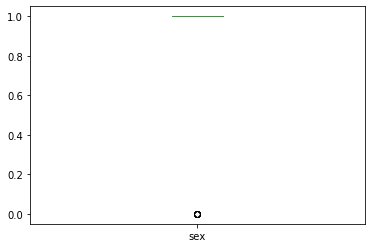

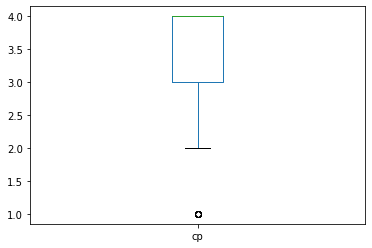

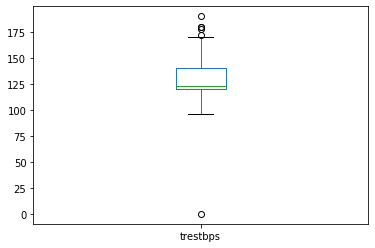

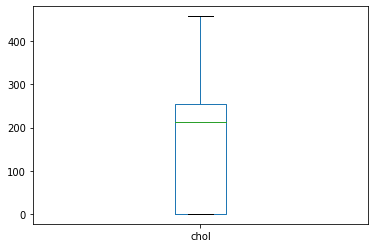

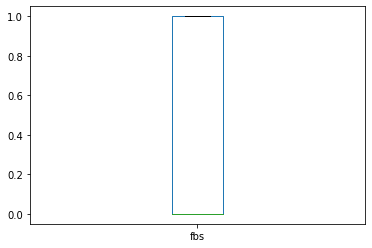

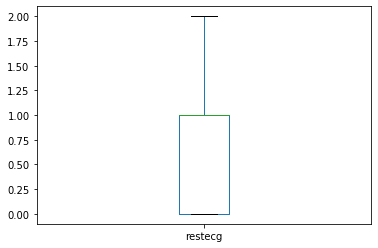

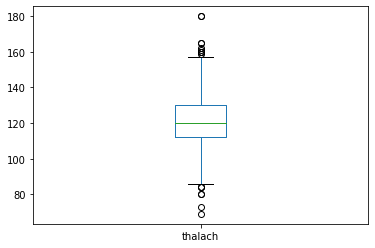

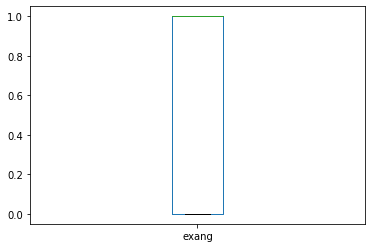

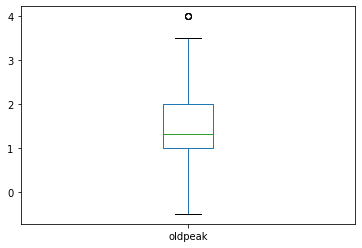

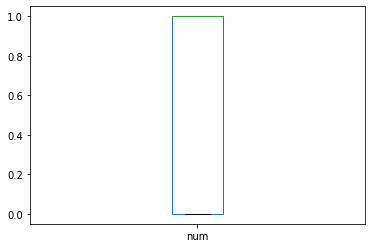

In [59]:
# plotting boxplot to get tghe idea of outliners
for col in df_hd.columns:
    df_hd[col].plot.box()
    plt.show()

#  Feature Engineering for Model building

In [60]:
#split the data of dependent and independent variable
df_x=df_hd.drop(['num'],axis=1)
y=df_hd['num']

In [61]:
#lets check the skewness of data
df_x.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.773003
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.423414
dtype: float64

In [62]:
#removing skewness using log transform
for col in df_x.columns:
    if df_x[col].skew()>0.55:
        df_x[col]=np.log1p(df_x[col])

In [63]:
#removing outliners using zscore
from scipy.stats import zscore
z_score=np.abs(zscore(df_x))
print(df_x.shape)
df_xnew=df_x[(z_score<3).all(axis=1)]
print(df_xnew.shape)

(200, 10)
(181, 10)


###### All the outliners are removed from the dataset

In [64]:
df_xnew

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,63,1,4,140,260,0.000000,1,112,1,3.000000
1,44,1,4,130,209,0.000000,1,127,0,0.000000
2,60,1,4,132,218,0.000000,1,140,1,1.500000
3,55,1,4,142,228,0.000000,1,149,1,2.500000
4,66,1,3,110,213,0.693147,2,99,1,1.300000
...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158,170,0.000000,1,138,1,0.000000
194,46,1,4,134,310,0.000000,0,126,0,0.000000
197,55,1,4,122,223,0.693147,1,100,0,0.000000
198,58,1,4,120,385,0.693147,2,120,1,1.320833


# Model selection/predictions

In [65]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [66]:
# Again checking the skewness
x.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.773003
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.423414
dtype: float64

In [79]:
# breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [80]:
# importing model for classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [113]:
#using classification algorithm with the help of loop
def model(m):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
        m.fit(x_train,y_train)
        predm=m.predict(x_test)
        a_score=accuracy_score(y_test,predm)
        if a_score>max_r_score:
            max_r_score=a_score
            final_r_state=r_state
    print("max accuracy score of ",m,"at random state",final_r_state,"is ",a_score)
   

In [124]:
Model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for m in Model:
    model(m)

max accuracy score of  LogisticRegression() at random state 83 is  0.7
max accuracy score of  GaussianNB() at random state 65 is  0.7
max accuracy score of  SVC() at random state 60 is  0.7
max accuracy score of  DecisionTreeClassifier() at random state 77 is  0.7
max accuracy score of  KNeighborsClassifier() at random state 47 is  0.8


- KNeighborsClassifier() is giving best score

### cross validation

In [115]:
#using the cross validation
from sklearn.model_selection import cross_val_score
Model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(), KNeighborsClassifier()]
for i in Model:
    scores=cross_val_score(i,x,y,cv=3)
    print("scores of ",i)
    print("mean score",scores.mean())
    print("Standard deviation",scores.std())
    print('\n-------------------------------------------------------------------------------------------------------')

scores of  LogisticRegression()
mean score 0.7598371777476256
Standard deviation 0.03353008230276007

-------------------------------------------------------------------------------------------------------
scores of  GaussianNB()
mean score 0.7348107945122871
Standard deviation 0.032405624147859025

-------------------------------------------------------------------------------------------------------
scores of  SVC()
mean score 0.7550128147143074
Standard deviation 0.006357053713947812

-------------------------------------------------------------------------------------------------------
scores of  DecisionTreeClassifier()
mean score 0.699984923865521
Standard deviation 0.036621665388267576

-------------------------------------------------------------------------------------------------------
scores of  KNeighborsClassifier()
mean score 0.7750640735715363
Standard deviation 0.0317852685697392

------------------------------------------------------------------------------------------

- Here also __KNeighborsClassifier()__ is giving best mean score

# Using GridSearchCV to improve KNeighborsClassifier()

In [116]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors': [3,5,11,19],  
              'weights': ['uniform','distance'],'metric':['euclidean','manhattan']}
gss=GridSearchCV(knn,parameters,cv=3)
gs=gss.fit(x_train,y_train)
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [117]:
knn=KNeighborsClassifier(n_neighbors=5,  
              weights='uniform',metric='manhattan')
knn.fit(x_train,y_train)
predm=knn.predict(x_test)
print('\n')
print("accuracy score of ",knn,'is',accuracy_score(y_test,predm))
print('\n')
print(confusion_matrix(y_test,predm))
print('\n')
print(classification_report(y_test,predm,zero_division=1))
print('\n')



accuracy score of  KNeighborsClassifier(metric='manhattan') is 0.75


[[ 4  6]
 [ 4 26]]


              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.81      0.87      0.84        30

    accuracy                           0.75        40
   macro avg       0.66      0.63      0.64        40
weighted avg       0.73      0.75      0.74        40





# Using ensemble techniques to boost score

In [139]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=80)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.875
[[ 5  5]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.86      1.00      0.92        30

    accuracy                           0.88        40
   macro avg       0.93      0.75      0.79        40
weighted avg       0.89      0.88      0.86        40



In [127]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100,random_state=42)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7
[[ 2  8]
 [ 4 26]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25        10
           1       0.76      0.87      0.81        30

    accuracy                           0.70        40
   macro avg       0.55      0.53      0.53        40
weighted avg       0.66      0.70      0.67        40



# Best model with roc_curve
##### AdaBoostClassifier is giving best score of all

accuracy_score: 0.875


confusion_matrix:
 [[ 5  5]
 [ 0 30]]


classification_report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.86      1.00      0.92        30

    accuracy                           0.88        40
   macro avg       0.93      0.75      0.79        40
weighted avg       0.89      0.88      0.86        40



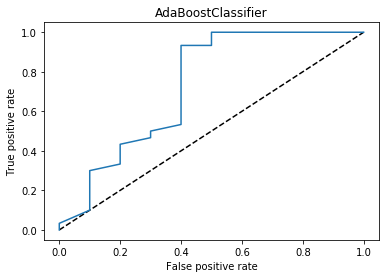

auc_score 0.75


In [143]:
# AdaBoostClassifier
# roc curve and roc_auc_score for all algorithms 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
rf=RandomForestClassifier(n_estimators=100,random_state=80)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,rf_pred))
print('\n')
print("confusion_matrix:\n",confusion_matrix(y_test,rf_pred))
print('\n')
print("classification_report:\n",classification_report(y_test,rf_pred))
y_pred_prob=rf.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score",auc_score)

# Saving the model

In [144]:
import joblib
joblib.dump(rf,"rf.heart.pkl")

['rf.heart.pkl']

# Conclusions:

- EDA has been carried out using Pandas and other plotting libraries through which we get know how column feature are playing role in heartdisease.
- Doing preproceesing in dataset helps in dealing with outliners present in the data
- Thorough the graph we can analyse that male have more heart problems.
- With the help of zscore also remove outliners which may effect the machine performance.
- Randomforest classifier is giving the best score. 